In [1]:
# Libería para tratamiento de datos
import numpy as np
import pandas as pd

# Algoritmos de Machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# División de Dataset de Training en Dataset de Train y Test
from sklearn.model_selection import train_test_split

# Métrica de Evaluación
from sklearn.metrics import log_loss

# Libería de visualización
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_uni = pd.read_csv("../intermedios/06_dataset_train.csv")
test_uni = pd.read_csv("../intermedios/06_dataset_submit.csv")

In [3]:
train_uni.head()

,COD_ENCUESTADO,Nombre Campus,NIVEL ACTUAL,Clave de carrera,Ciclo,IND_GEA,IND_DELEGADO,CANT_CURSOS_MATRICU_SIN_INGLES,UOD_depostista_ind_deportista,NPS,...,MODA_MIN,MAX_MIN,MEDIA_MIN,MODA_PESO_GMEAN,MIN_MAX,MODA_VARIATION,MEDIANA_MIN,MIN_KURTOSIS,HMEAN_MIN,GMEAN_MIN
0,13501,1,1,3,2,0,1,6,0,2,...,3,3,3.000000,2.252567,3,0.141421,3.0,-1.500000,3.000000,3.000000
1,23622,3,1,25,1,0,1,5,0,2,...,3,4,2.468217,1.528322,1,0.117688,3.0,-3.000000,2.119335,2.309303
2,8354,4,1,31,1,0,0,5,0,3,...,3,4,2.727891,2.184358,4,0.118451,3.0,10.071429,2.347132,2.555151
3,17745,4,1,28,6,1,0,6,0,2,...,3,4,2.909091,2.085288,1,0.128565,3.0,-3.000000,2.613861,2.778487
4,10867,3,1,34,1,0,0,6,0,2,...,3,4,2.362733,1.416149,1,0.000000,3.0,-3.000000,2.010406,2.201128


In [4]:
predictores = [x for x in train_uni.columns.tolist() if x not in ["COD_ENCUESTADO","NPS"]]

# Mejores variables:
#predictores = ['MEDIA_GMEAN', 'MEDIA_MEDIA', 'MODA_MEDIA', 'HMEAN_GMEAN', 'MODA_MIN'] la mejor con 71
#predictores = ['MEDIA_GMEAN','MEDIA_MEDIA','MODA_MEDIA','HMEAN_GMEAN','MODA_MIN','MAX_MIN','MEDIA_MIN','MODA_PESO_GMEAN','MIN_MAX','MODA_VARIATION','LSTD_MEDIA','MEDIANA_MIN','MIN_KURTOSIS','HMEAN_MIN','GMEAN_MIN','MODA_LSTD']

In [5]:
X = train_uni
y = train_uni["NPS"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Decision Tree

In [8]:
dtree = DecisionTreeClassifier(criterion='entropy')

In [9]:
dtree.fit(X_train[predictores], y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
y_pred_tree = dtree.predict_proba(X_test[predictores])

In [11]:
yreal = pd.DataFrame(pd.get_dummies(pd.DataFrame(y_test.values, columns=["Clase"]).astype(str)))

In [12]:
log_loss(yreal, y_pred_tree)

12.511845035851536

# Random Forest

In [13]:
rforest = RandomForestClassifier(n_estimators=50, bootstrap=True,random_state=0, n_jobs=-1)

In [14]:
rforest.fit(X_train[predictores], y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [15]:
y_pred_forest = rforest.predict_proba(X_test[predictores])

In [16]:
log_loss(yreal, y_pred_forest)

1.0084846608609022

# Feature Importance

In [17]:
def plot_feature_importance(ensemble_model, predictores, top):
    feature_importance = ensemble_model.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)[:top:-1]

    plt.figure(figsize=(6 * 1.618, 6))
    index = np.arange(top)
    bar_width = 0.5
    plt.bar(index, feature_importance[sorted_idx][:top], color='black', alpha=0.5)
    plt.xlabel('Variables')
    plt.ylabel('Importancia')
    plt.title('Importancia de variables')
    plt.xticks(index + bar_width, np.array(predictores)[sorted_idx][:top], rotation='vertical')
    plt.tight_layout()
    plt.show()

def list_feature_importance(ensemble_model, predictores):
    feature_importance = ensemble_model.feature_importances_
    sorted_idx = np.argsort(feature_importance)[::-1]
    return pd.DataFrame({'variable':np.array(predictores)[sorted_idx], 'importancia':feature_importance[sorted_idx]}, columns=[['variable', 'importancia']])

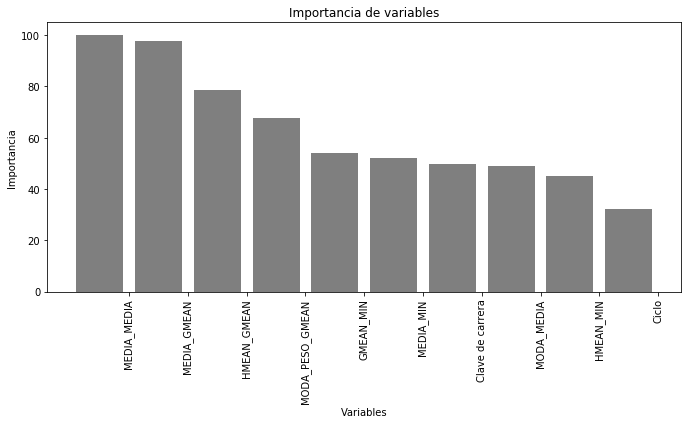

In [18]:
plot_feature_importance(rforest, predictores, 10)

In [19]:
list_feature_importance(rforest, predictores)

,variable,importancia
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


# Xtreme Gradient Boosting

In [20]:
xg_train = xgb.DMatrix(X_train[predictores], label=y_train)
xg_test = xgb.DMatrix(X_test[predictores], label=y_test)

In [21]:
param = {}
# use softmax multi-class classification
#param['objective'] = 'multi:softmax'
param['objective'] = 'multi:softprob'
# scale weight of positive examples
param['eta'] = 0.1
param['max_depth'] = 6
param['silent'] = 1
param['nthread'] = 4
param['num_class'] = 4
param['eval_metric'] = 'mlogloss'
watchlist = [(xg_train, 'train'), (xg_test, 'test')]
num_boost_round = 10

In [22]:
bst = xgb.train(param, xg_train, num_boost_round, watchlist)

[0]	train-mlogloss:1.28903	test-mlogloss:1.28996
[1]	train-mlogloss:1.20871	test-mlogloss:1.21109
[2]	train-mlogloss:1.14055	test-mlogloss:1.14428
[3]	train-mlogloss:1.08254	test-mlogloss:1.08759
[4]	train-mlogloss:1.0322	test-mlogloss:1.03867
[5]	train-mlogloss:0.988396	test-mlogloss:0.996561
[6]	train-mlogloss:0.949853	test-mlogloss:0.959831
[7]	train-mlogloss:0.916005	test-mlogloss:0.927349
[8]	train-mlogloss:0.885718	test-mlogloss:0.898826
[9]	train-mlogloss:0.859122	test-mlogloss:0.873387


In [23]:
y_pred_xgb = bst.predict(xg_test)

In [24]:
log_loss(yreal, y_pred_xgb)

0.87338711446523665

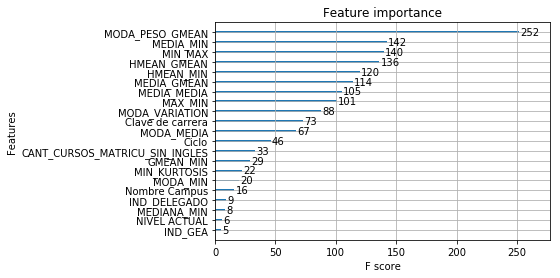

In [25]:
xgb.plot_importance(bst)